
# Predicting the survival of passengers of the titanic disaster with machine learning

This project aims to predict the outcome of the titanic disaster using machine learning. The given data is split into training and test data. The train.csv will be used to fit the machine learning algorithms which are then applied on the test.csv to predict who will surivive. The datasets consist of different characteristics that are listed below:


| Variable | Definition | Key |
| :- | -: | :-: |
| PClass | Passenger Class | 1=1st, 2=2nd, 3=3rd |
| Sex | Gender | |
| Age | Age in years |
| SibSp | # of siblings / spouses aboard the titanic  |
| Parch | # of parents / children aboard the titanic |
| Ticket | Ticket number |
| Fare | Passerger fare |
| Cabin | Cabin number | 
| Embarked | Port of boarding the ship | C = Cherbourg, Q = Queenstown, S = Southampton |
| Survived | Survival | 0=No, 1=Yes |


Variable Notes

pclass:
1st = Upper,
2nd = Middle,
3rd = Lower

age: The age is fractional if less than 1. If the age is estimated, it will have the form xx.5

sibsp: <br> The dataset defines family relations in this way: <br>
Sibling = brother, sister, stepbrother, stepsister <br>
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: <br> The dataset defines family relations in this way: <br>
Parent = mother, father <br> Child = daughter, son, stepdaughter, stepson <br> Some children travelled only with a nanny, therefore parch=0 for them.

This exercise is split into three parts with data processing being the longest and most important part.
1. Data vizualization
2. Data processing
3. Machine learning algorithms


## Import libaries


First we have to import all libraries that we will need at a later point of the exercise. Seaborn and matplotlib are used for data vizulization. Pandas and numpy will help with data processing and linear algebra. At last the databases for the different machine learing algorithms are imported from sklearn. Optionally an image database is added for the purpose of addind pictures into the Jupyter notebook.

In [37]:
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# data processing
import pandas as pd 

# linear algebra
import numpy as np 

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn import tree

#Show images
from PIL import Image

# 1. Data vizualization

The first part data vizualization is there to get an understanding of the data set. Only by knowing what we are working with, we can determine what data we need or don't. <br>
With all libraries imported we can start by cearting new variables "test_df" which will contain our test set and trand_df which includes the training set. To do this we use the pandas function "read_csv".

In [38]:
#Loading the datasets
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv") #machen lassen

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The .info() function in Python shows us information regarding the data set. It displays all columns, the count of entires inside the columns and what type they have. In this case we have two float64, five int64 and five objects. 

In [40]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
 train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


By taking a quick look at the training set, some issues are noticable. There are enties __missing__ (NaN = not a number) which have to be dealt with. Furthermore a lot of entries __are not numeric__, which means they have to converted __into numeric values__ for the machine learning algorithms. 

Lets take a closer look at what's actually missing.

In [42]:
#Check for NaN or empty entries in trainingsdata
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


With only two missing values the Embarked feature can easily be filled. The Age feature is not that simple to fill and the Cabin feature with 687 missing values will probably be dropped alltogether. 

In [43]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Age and Sex

For the graphical display of the Age and Sex regarding the survival rate, we will be using a histgram. A histogram shows the distributio of a specific feature. In this case it is the distribution of female and male passengers regarding their age and how many survived.

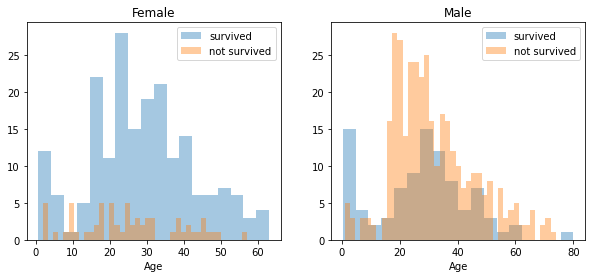

In [44]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')
#vorgeben

## Embarked, Pclass and Sex

To visualize the feature Embarked we will be using FacetGrid. It helps in displaying distributions or relationships between multiple variables. 

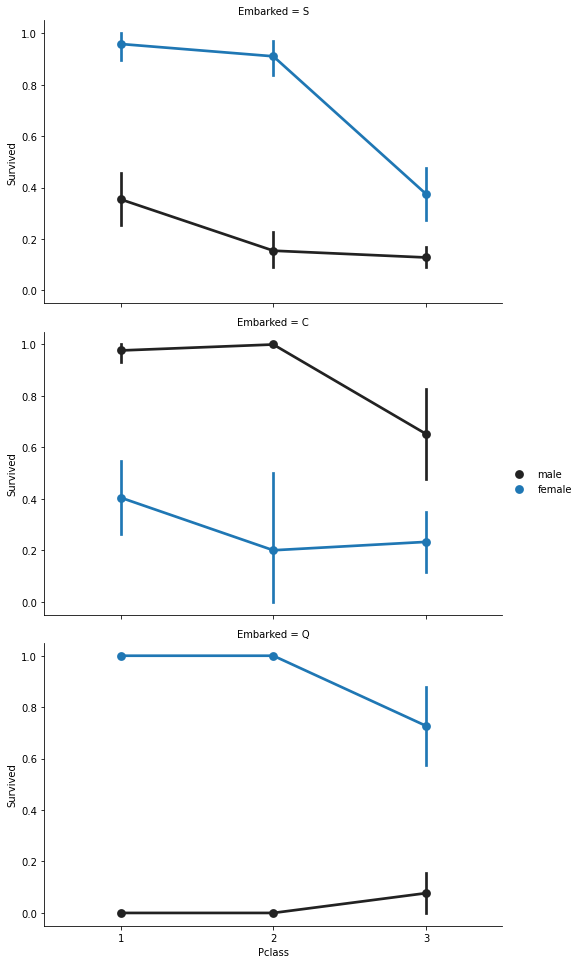

In [45]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()
#machen lassen

The Embarked feature also shows to have a big impact on the survival chance of the passengers. Men that embarked on port C have a higher chance of survival than port S or Q. Women on the other hand have a low survival rate on port C and high chances at port S and Q. <br>
The class also seems to have an affect on the survival rate.

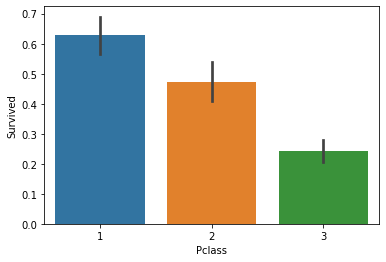

In [46]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
#machen lassen

It is immediately evident that class 1 has the most survivors and class 3 the least.

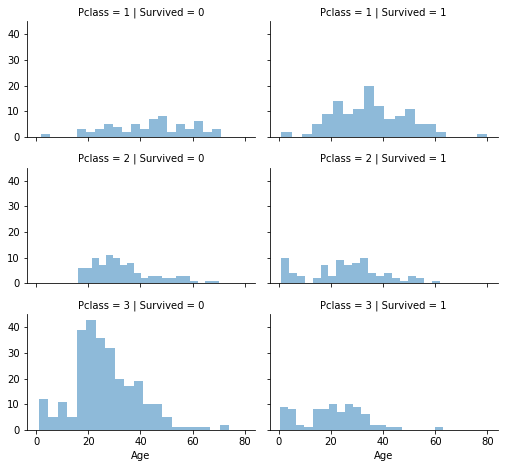

In [47]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
#machen lassen

This plot shows the influence of Pclass and highlights the high mortality rate of passengers in class 3.

## SibSp and Parch

SibSp and Parch are features that both show passengers and how many relatives they have on board. Consequently this feature should be combined into a single one. The followong code creates a new feature "not_alone" that shows if a passengers is not alone.

In [48]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

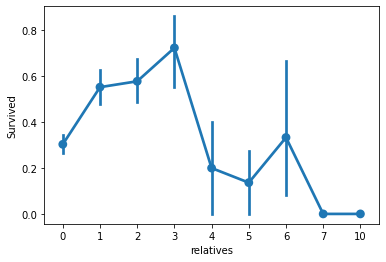

In [49]:
axes = sns.pointplot('relatives','Survived', data=train_df, aspect = 2.5)

Thw plot shows the survival rate in regards of the relatives a person has. Passengers with 1-3 relatives have higher chances of survival.

# 2. Data processing

After we established an understanding for the data we can start shaping it into the form we need. For the machine learning algorithms we would want everything to be in numeric values and to be similar in scale. 

## PassengerId

The PassengerId doesn't have influence on the survival chance. In this case we will drop the column from the training set.

In [50]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [51]:
#Check tickets
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [52]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

## Handling the missing data

### Cabin

Looking back at the features, we have 687 missing values in Cabin, 177 values in Age and only 2 in Embarked. <br>
The values in Cabin are composed of a letter and a number, with the letter being the deck. Instead of dropping the feature as a whole we will only drop the number and create a new feature called "deck", resulting from the letter of the Cabin. The deck letter will be converted into numeric and missing values are 0.

In [53]:
#Old feature 'Cabin'
print(train_df['Cabin'].head(8))

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
Name: Cabin, dtype: object


In [54]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

(Comparison between Cabin and deck)

In [55]:
#New feature 'Deck'
print(dataset['Deck'].head(8))

0    8
1    8
2    8
3    8
4    8
5    8
6    8
7    8
Name: Deck, dtype: int64


### Age

For the Age new values will be added derived from the mean age of the standard deviation. 

In [56]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [57]:
print(train_df['Age'])

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    36
889    26
890    32
Name: Age, Length: 891, dtype: int64


The Embarked feature  has two missing values. These will be filled out with the most common feature. The .describe() function in Python counts all values returns the most top feature. This is only for categorial values. For numeric values the .describe() funcion returns percentiles and mean values. 

In [58]:
train_df['Embarked'].describe() 
#.describe funktioniert bei numerischen und kategorischen Serien verschieden. Nur bei kategorischen Daten wird die folgende Ansicht erreicht. Wenn weiter unten
# die Werte in numerisch umgewandelt werden, wird der Durchschnitt etc. ausgerechnet.

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

For the Embarked feature the most common one is the port S, with 644 entrires.

In [59]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

After filling in all the missing values we can check our dataset with .info(). All features should now contain 891 entires and zero missing values. <br> We can also spot the newly added featues "not_alone" and "Deck". The imorted image shows the original dataset without the data processing. 

As mentioned earlier, all features should be numeric values. The next step shows the convertion into numeric values.

In [61]:
#Converting "fare" from float64 to int 64
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [62]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

Again using the .map() function we are defining male as 0 and female as 1. <br>
The same is done to convert the ports S, C und Q from the Embarked feature.

In [63]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [64]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

After all values have been converted to numeric, we are left with the following train dataset. <br>



In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   Age        891 non-null    int64
 4   SibSp      891 non-null    int64
 5   Parch      891 non-null    int64
 6   Fare       891 non-null    int64
 7   Embarked   891 non-null    int64
 8   relatives  891 non-null    int64
 9   not_alone  891 non-null    int64
 10  Deck       891 non-null    int64
 11  Title      891 non-null    int64
dtypes: int64(12)
memory usage: 83.7 KB


## Creating new categories

In [66]:
test = pd.qcut(train_df['Age'], 8)

In [67]:
test.value_counts()

(16.0, 21.0]      136
(24.0, 29.0]      129
(37.0, 45.0]      117
(-0.001, 16.0]    116
(29.0, 33.0]      114
(45.0, 80.0]      101
(33.0, 37.0]       91
(21.0, 24.0]       87
Name: Age, dtype: int64

In [68]:
#Creating Categories
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int) 
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 21), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 21) & (dataset['Age'] <= 24), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 28), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 32), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 37), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 45), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 7

# let's see how it's distributed 
train_df['Age'].value_counts()

1    136
5    120
6    117
0    116
4    110
3    104
7    101
2     87
Name: Age, dtype: int64

In [69]:
train_df['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

Using the qcut() function, pandas can create ranged groups that have similar amounts of entries.<br>
After that we can go through the data and assign the group to each value.

In [70]:
groups = pd.qcut(train_df['Fare'], 6)

In [71]:
groups.value_counts()

(-0.001, 7.0]    241
(14.0, 26.0]     165
(52.0, 512.0]    146
(8.0, 14.0]      146
(26.0, 52.0]     123
(7.0, 8.0]        70
Name: Fare, dtype: int64

In [72]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [73]:
train_df['Fare'].value_counts()

0    241
3    165
5    146
2    146
4    123
1     70
Name: Fare, dtype: int64

In [74]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [75]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,6,1,0,5,1,1,0,3,3,6,2
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,5,0,1,0,3,3,5,2
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,2,0,0,1,2,0,1,8,1,6,1
6,0,1,0,7,0,0,4,0,0,1,5,1,7,4
7,0,3,0,0,3,1,3,0,4,0,8,4,0,0
8,1,3,1,3,0,2,2,0,2,0,8,3,9,0
9,1,2,1,0,1,0,4,1,1,0,8,3,0,2


# 3. Machine Learning Algorithms

In [77]:
## Drop the "Survived" feature out ot the training dataset and use the resulting dataset as "Predictor", name it X_train. 
## Take the "Survived" feature from the training dataset as "Response" for your models, name it Y_train.

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

## This you can also do ! Delete the #
X_test  = test_df.drop("PassengerId", axis=1).copy()

## Decision Tree 

In [91]:
## Apply the Decision tree algorithm to the training dataset  
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

## We want to evaluate the score of each prediction model, it is also sufficient to round the score to two places
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

93.49

## Stochastic Gradient Decent 

In [90]:
## Apply the SGD algorithm to the training dataset with a maximum number of iteration = 5 and tol = None
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train,Y_train)
Y_pred= sgd.predict(X_test)
sgd.score(X_train, Y_train)

## Evaluate the score as for Decision Tree
acc_sgd = round(sgd.score(X_train, Y_train)*100,2)
acc_sgd

79.46

## Random Forest

In [89]:
## Apply the Random Forest algorithm to the training dataset with a maximum number of estimators = 100
random_forest= RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

## Evaluate the score as for Random Forest
random_forest.score(X_train, Y_train)
acc_random_forest=round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

93.49

## Logistic Regression

In [88]:
## Apply the Logistic Regression algorithm to the training dataset 
logreg= LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred= logreg.predict(X_test)


## Evaluate the score as for Logistic Regression
acc_log= round(logreg.score(X_train, Y_train)*100,2)
acc_log

/home/adm_schiffler/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


81.26

## K nearest neighbour

In [95]:
## Apply the KNN algorithm to the training dataset with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

## Evaluate the score as for KNN
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.32

## Gaussian Naive Bayes

In [96]:
## Apply the Gaussian Naive Bayes algorithm to the training dataset
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)


## Evaluate the score as for Gaussian Naive Bayes
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.33

## Perceptron

In [97]:
## Apply the Perceptron algorithm to the training dataset with 5 iterations
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

## Evaluate the score as for Perceptron
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/home/adm_schiffler/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


80.81

## Linear Support Vector Machine

In [98]:
## Apply the Linear Support Vector Machine algorithm to the training dataset with 5 iterations
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

## Evaluate the score as for Linear Support Vector Machine
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/home/adm_schiffler/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


81.14

## Results 

In [100]:
## In the end of our  first comprehensive Machine Learning example we want the know which model fits best to our problem. 
## Therefore change, if neccessary, the code according to your given variables for the score

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.49,Random Forest
93.49,Decision Tree
87.32,KNN
81.26,Logistic Regression
81.14,Support Vector Machines
80.81,Perceptron
79.46,Stochastic Gradient Decent
77.33,Naive Bayes
